In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules,apriori

In [2]:
df=pd.read_excel('Online retail.xlsx',header=None)
df.columns=['Products']
df

,Products
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [3]:
#EDA

In [4]:
df.dropna(inplace=True)

In [5]:
data = [i.split(',') for i in df['Products']]
data

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [6]:
from mlxtend.preprocessing import TransactionEncoder

In [7]:
te=TransactionEncoder()
encodeddata=te.fit_transform(data)

In [8]:
pd.DataFrame(encodeddata)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [10]:
data=pd.DataFrame(encodeddata,columns=te.columns_)
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.replace([True,False],[1,0],inplace=True)
data

C:\Users\Ved Patil\AppData\Local\Temp\ipykernel_7852\613110962.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace([True,False],[1,0],inplace=True)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.sum(axis=1).value_counts().sort_index()


1     1754
2     1358
3     1044
4      816
5      667
6      493
7      391
8      324
9      259
10     139
11     102
12      67
13      40
14      22
15      17
16       4
18       1
19       2
20       1
Name: count, dtype: int64

In [38]:
#tried different minimum support values 0.03 worked the best

In [34]:
scores=apriori(data,min_support=0.003, use_colnames=True)


C:\Users\Ved Patil\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [36]:
scores

,support,itemsets
0,0.020397,(almonds)
1,0.008932,(antioxydant juice)
2,0.004666,(asparagus)
3,0.033329,(avocado)
4,0.004533,(babies food)
...,...,...
1438,0.003066,"(pancakes, ground beef, spaghetti, mineral water)"
1439,0.003066,"(ground beef, tomatoes, spaghetti, mineral water)"
1440,0.003333,"(milk, spaghetti, olive oil, mineral water)"
1441,0.003066,"(shrimp, milk, spaghetti, mineral water)"


In [14]:
rules = association_rules(scores, metric="lift", min_threshold=1)

In [15]:
rules[['antecedents','consequents','antecedent support','consequent support','support',	'confidence','lift']]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(avocado),(almonds),0.033329,0.020397,0.001733,0.052000,2.549359
1,(almonds),(avocado),0.020397,0.033329,0.001733,0.084967,2.549359
2,(burgers),(almonds),0.087188,0.020397,0.005199,0.059633,2.923577
3,(almonds),(burgers),0.020397,0.087188,0.005199,0.254902,2.923577
4,(cake),(almonds),0.081056,0.020397,0.003066,0.037829,1.854607
...,...,...,...,...,...,...,...
40585,(spaghetti),"(milk, mineral water, frozen vegetables, groun...",0.174110,0.002000,0.001067,0.006126,3.063196
40586,(frozen vegetables),"(milk, spaghetti, mineral water, ground beef, ...",0.095321,0.001200,0.001067,0.011189,9.325253
40587,(mineral water),"(milk, spaghetti, frozen vegetables, ground be...",0.238368,0.001600,0.001067,0.004474,2.796793
40588,(ground beef),"(milk, spaghetti, mineral water, frozen vegeta...",0.098254,0.002000,0.001067,0.010855,5.428132


In [40]:
top_rules = rules.sort_values(by='lift', ascending=False).head(10)


In [42]:
top_rules['rule'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " + \
                    top_rules['consequents'].apply(lambda x: ', '.join(list(x)))


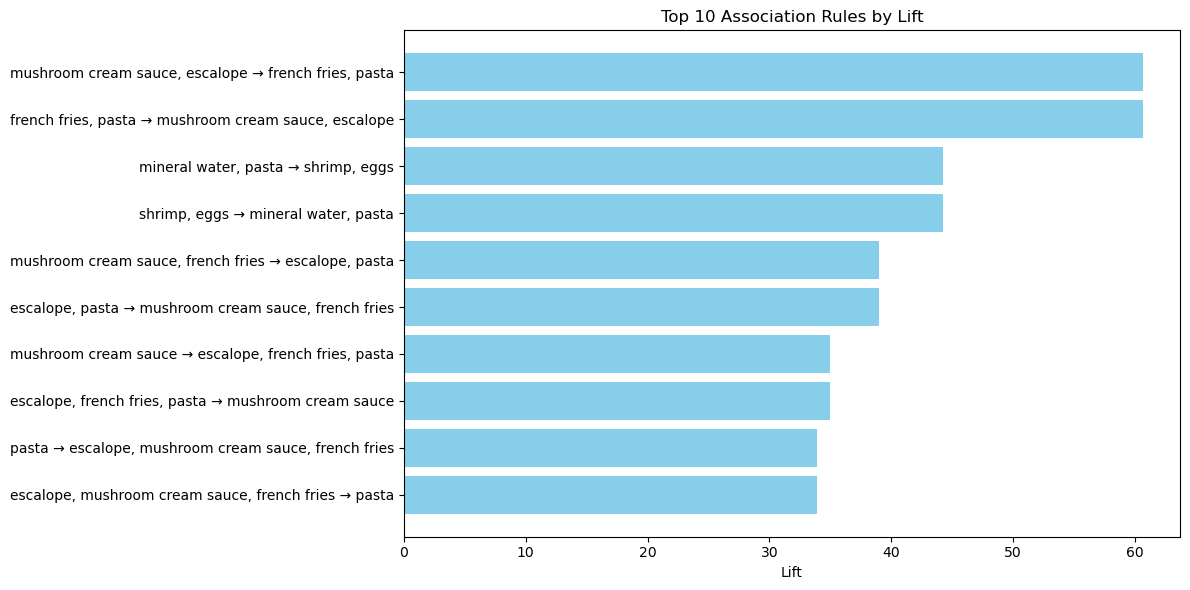

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_rules['rule'], top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


#interpretation
1]- customers who buy mushroom cream sauce and escalope are highly likely to purchase French fries and pasta together
2]- French fries and pasta trigger the purchase of mushroom cream sauce and escalope
and so....... these have the highest lift.